# WWR Data Pre-processing Task - 1.2

__Problem Statement:__ Clean and process the provided dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy import interpolate, stats
import math

In [2]:
df2_raw = pd.read_csv('MPURotationData_0.csv')

In [3]:
df2_raw

,time,roll,pitch
0,0.0095,3.7256,-23.3641
1,0.0171,3.7291,-22.7685
2,0.0244,3.1049,-22.8605
3,0.0318,2.5190,-22.8564
4,0.0391,2.8347,-22.9684
...,...,...,...
5266,39.2604,-4.4577,-23.9418
5267,39.2677,-3.8859,-25.6099
5268,39.2752,-3.9607,-27.2668
5269,39.2826,-3.7560,-27.6581


In [4]:
df2_raw.isnull().sum()

time     0
roll     0
pitch    0
dtype: int64

In [5]:
missing_value2 = ['0']
df2_raw = pd.read_csv('MPURotationData_0.csv', na_values=missing_value2)

In [6]:
df2_raw.isnull().sum()

time     0
roll     0
pitch    0
dtype: int64

In [7]:
df2_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    5271 non-null   float64
 1   roll    5271 non-null   float64
 2   pitch   5271 non-null   float64
dtypes: float64(3)
memory usage: 123.7 KB


In [8]:
df2_raw.describe()

,time,roll,pitch
count,5271.000000,5271.000000,5271.000000
mean,19.651426,6.834331,-16.126160
std,11.330240,27.177024,29.266026
min,0.009500,-71.564100,-88.787900
25%,9.857300,-2.457700,-28.662350
50%,19.636200,3.682100,-21.463500
75%,29.447450,12.352650,-4.434650
max,39.290000,82.568800,89.396800


In [9]:
df2_raw.sort_values(by=['time'], inplace=True)

In [10]:
duplicate_roll = df2_raw[df2_raw.duplicated(['time', 'roll'], keep = False)]
duplicate_pitch = df2_raw[df2_raw.duplicated(['time', 'pitch'], keep = False)]
duplicate_rp = df2_raw[df2_raw.duplicated(['roll', 'pitch'], keep = False)]

In [11]:
duplicate_roll

,time,roll,pitch


In [12]:
duplicate_pitch

,time,roll,pitch


In [13]:
duplicate_rp

,time,roll,pitch


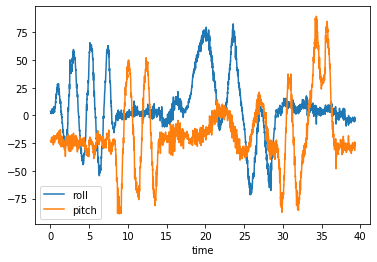

In [14]:
df2_raw.plot.line(x='time')

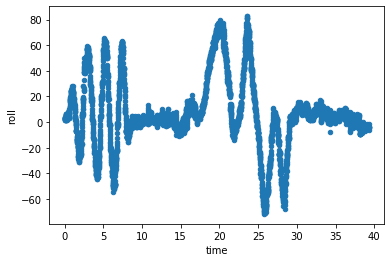

In [15]:
df2_raw.plot.scatter(x='time', y='roll')

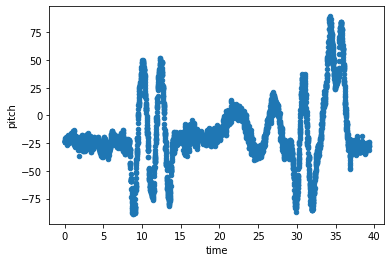

In [16]:
df2_raw.plot.scatter(x='time', y='pitch')

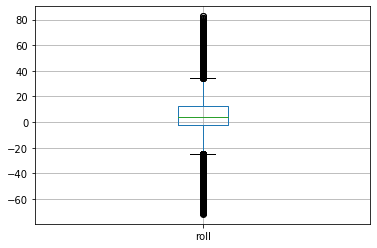

In [17]:
df2_raw.boxplot(column='roll')

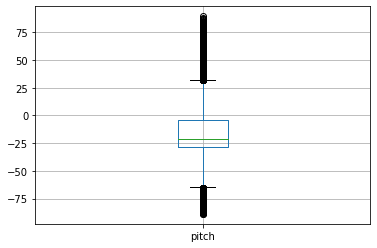

In [18]:
df2_raw.boxplot(column='pitch')

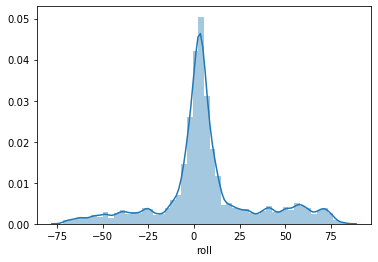

In [19]:
sb.distplot(df2_raw['roll'])

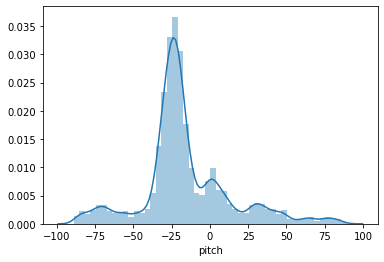

In [20]:
sb.distplot(df2_raw['pitch'])

In [21]:
df2 = df2_raw.copy()

In [22]:
df2['roll'].skew()

0.26739861162362666

In [23]:
df2['pitch'].skew()

0.7107702346960882

In [24]:
threshold = 3
zscore_roll = np.abs(stats.zscore(df2['roll']))
df2['roll'].iloc[zscore_roll > threshold]

Series([], Name: roll, dtype: float64)

In [25]:
zscore_pitch = np.abs(stats.zscore(df2['pitch']))
df2['pitch'].iloc[zscore_pitch > threshold]

4582    72.0447
4583    78.0519
4584    83.8860
4585    87.4687
4586    86.2456
         ...   
4797    78.0769
4798    77.7250
4799    76.8898
4800    74.0135
4801    72.5370
Name: pitch, Length: 76, dtype: float64

In [26]:
df2['Z-Score Roll'] = pd.Series(zscore_roll)
df2['Z-Score Pitch'] = pd.Series(zscore_pitch)

In [27]:
df2 = df2.drop(df2[(df2['Z-Score Roll'] > threshold) | (df2['Z-Score Pitch'] > threshold)].index)

In [28]:
df2 = df2.drop(['Z-Score Roll', 'Z-Score Pitch'], axis=1)

In [29]:
df2['roll'].skew()

0.26156987439773116

In [30]:
df2['pitch'].skew()

0.42547330678484885

In [31]:
final_df2 = df2.reset_index().drop(['index'], axis=1)
final_df2

,time,roll,pitch
0,0.0095,3.7256,-23.3641
1,0.0171,3.7291,-22.7685
2,0.0244,3.1049,-22.8605
3,0.0318,2.5190,-22.8564
4,0.0391,2.8347,-22.9684
...,...,...,...
5190,39.2604,-4.4577,-23.9418
5191,39.2677,-3.8859,-25.6099
5192,39.2752,-3.9607,-27.2668
5193,39.2826,-3.7560,-27.6581


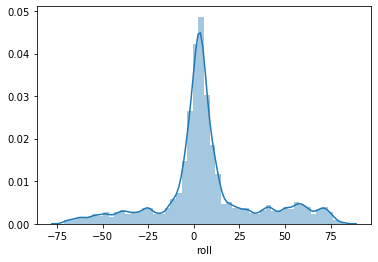

In [32]:
sb.distplot(final_df2['roll'])

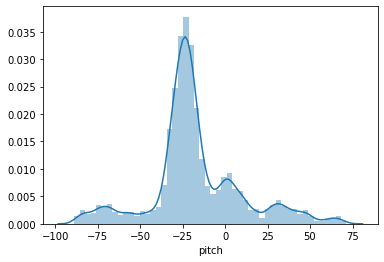

In [33]:
sb.distplot(final_df2['pitch'])